Reference: 

https://www.youtube.com/watch?v=bvCE4EmrUOI 

In [ ]:
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import dlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!wget   http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/shape_predictor_5_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_5_face_landmarks.dat"

--2022-07-13 01:50:39--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  --.-KB/s    in 0.1s    

2022-07-13 01:50:39 (45.0 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]



In [ ]:
!wget   http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/dlib_face_recognition_resnet_model_v1.dat.bz2

datFile =  "/content/dlib_face_recognition_resnet_model_v1.dat.bz2"

--2022-07-13 01:50:39--  http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21428389 (20M)
Saving to: ‘dlib_face_recognition_resnet_model_v1.dat.bz2’

dlib_face_recogniti 100%[===================>]  20.44M   111MB/s    in 0.2s    

2022-07-13 01:50:40 (111 MB/s) - ‘dlib_face_recognition_resnet_model_v1.dat.bz2’ saved [21428389/21428389]



In [ ]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
model = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")

In [ ]:
img1_path = "youngdebb.jpg"
img2_path = "hannah.jpeg"
img3_path = "old depp.jpg"

In [ ]:
img1 = dlib.load_rgb_image(img1_path)
img2 = dlib.load_rgb_image(img2_path)
img3 = dlib.load_rgb_image(img3_path)

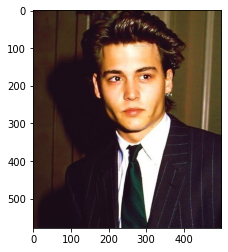

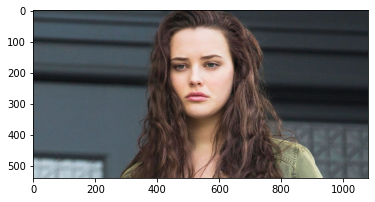

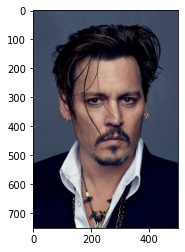

In [ ]:
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.show()

In [ ]:
img1_detected = detector(img1, 1)
img2_detected = detector(img2, 1)
img3_detected = detector(img3, 1)

In [ ]:
img1_shape = sp(img1, img1_detected[0])
img2_shape = sp(img2, img2_detected[0])
img3_shape = sp(img3, img3_detected[0])

In [ ]:
img1_aligned = dlib.get_face_chip(img1, img1_shape)
img2_aligned = dlib.get_face_chip(img2, img2_shape)
img3_aligned = dlib.get_face_chip(img3, img3_shape)

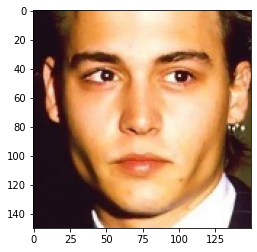

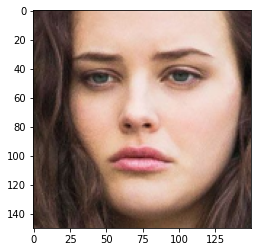

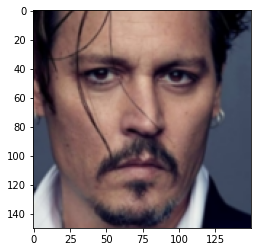

In [ ]:
plt.imshow(img1_aligned)
plt.show()
plt.imshow(img2_aligned)
plt.show()
plt.imshow(img3_aligned)
plt.show()

In [ ]:
img1_representation = model.compute_face_descriptor(img1_aligned)
img2_representation = model.compute_face_descriptor(img2_aligned)
img3_representation = model.compute_face_descriptor(img3_aligned)

In [ ]:
img1_representation = np.array(img1_representation)
img2_representation = np.array(img2_representation)
img3_representation = np.array(img3_representation)

In [ ]:
def findEuclideanDistance(source_representation, test_representation):
  euclidean_distance = source_representation - test_representation
  euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
  euclidean_distance = np.sqrt(euclidean_distance)
  return euclidean_distance

In [ ]:
distance = findEuclideanDistance(img1_representation, img2_representation)
distance2 = findEuclideanDistance(img1_representation, img3_representation)

In [ ]:
print(distance)
print(distance2)

0.770430763782335
0.5751199389581034


In [ ]:
threshold = 0.6

In [ ]:
print("Young debb and Hannah: ")
if distance < threshold: 
  print("Are the same person")
else: 
  print('Are not the same person')

Young debb and Hannah: 
Are not the same person


In [ ]:
print("Young debb and Old debb: ")
if distance2 < threshold: 
  print("Are the same person")
else: 
  print('Are not the same person')

Young debb and Old debb: 
Are the same person
